In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np


In [2]:
tickers = ["NVDA", "META", "AAPL", "MSFT", "TSM", "AMD", "AVGO"]
etfs = ["SPY", "IWM", "DIA"]
assets = tickers + etfs

[*********************100%%**********************]  10 of 10 completed


### Step 2: Retrieve daily open or close data on your assets for the previous 2 years

In [ ]:
data = yf.download(assets, period = '2y')
returns = data['Adj Close'].pct_change().dropna()

In [4]:
data['Adj Close'].head()

,AAPL,AMD,AVGO,DIA,IWM,META,MSFT,NVDA,SPY,TSM
Date,,,,,,,,,,
2021-10-18,144.873932,116.430000,475.971161,339.283813,218.702286,335.339996,301.821960,221.906265,433.696625,110.813805
2021-10-19,147.058670,116.330002,482.618652,341.170288,219.518661,339.989990,302.745239,222.585312,437.042511,112.370232
2021-10-20,147.552917,116.389999,481.673096,342.681458,220.976471,340.779999,301.939819,220.717957,438.759064,111.053993
2021-10-21,147.770416,119.330002,486.174072,342.614044,221.540161,341.880005,305.230255,226.599640,439.903564,111.726517
2021-10-22,146.989456,119.820000,487.365479,343.364807,221.015366,324.609985,303.658691,226.939163,439.447693,109.747368
...,...,...,...,...,...,...,...,...,...,...
2023-10-10,178.389999,109.010002,858.409973,337.450012,175.970001,321.839996,328.390015,457.980011,434.540009,90.610001
2023-10-11,179.800003,108.309998,874.559998,338.029999,175.669998,327.820007,332.420013,468.059998,436.320007,92.000000
2023-10-12,180.710007,108.790001,905.599976,336.269989,171.699997,324.160004,331.160004,469.450012,433.660004,92.419998


In [5]:
returns.tail()

,AAPL,AMD,AVGO,DIA,IWM,META,MSFT,NVDA,SPY,TSM
Date,,,,,,,,,,
2021-10-19,0.015080,-0.000859,0.013966,0.005560,0.003733,0.013867,0.003059,0.003060,0.007715,0.014045
2021-10-20,0.003361,0.000516,-0.001959,0.004429,0.006641,0.002324,-0.002660,-0.008389,0.003928,-0.011713
2021-10-21,0.001474,0.025260,0.009344,-0.000197,0.002551,0.003228,0.010898,0.026648,0.002608,0.006056
2021-10-22,-0.005285,0.004106,0.002451,0.002191,-0.002369,-0.050515,-0.005149,0.001498,-0.001036,-0.017714
2021-10-25,-0.000336,0.021198,0.012922,0.002270,0.009498,0.012569,-0.003332,0.019361,0.005363,-0.005165
...,...,...,...,...,...,...,...,...,...,...
2023-10-10,-0.003352,0.019071,0.002956,0.004047,0.011322,0.010931,-0.004336,0.011596,0.005205,0.018204
2023-10-11,0.007904,-0.006421,0.018814,0.001719,-0.001705,0.018581,0.012272,0.022010,0.004096,0.015340
2023-10-12,0.005061,0.004432,0.035492,-0.005207,-0.022599,-0.011165,-0.003790,0.002970,-0.006096,0.004565


### Step 3: Calculate the mean, variance, and correlation matrix for all assets

In [7]:
# Mean and Variance
table = pd.DataFrame(index=assets)
table['Mean'] = returns.mean()  # Calculating mean on returns
table['Variance'] = returns.var()  # Calculating variance on returns

table.round(4)  # Displaying the mean and variance table

,Mean,Variance
NVDA,0.0021,0.0014
META,0.0005,0.0012
AAPL,0.0006,0.0004
MSFT,0.0004,0.0004
TSM,-0.0001,0.0005
AMD,0.0004,0.0012
AVGO,0.0015,0.0005
SPY,0.0001,0.0002
IWM,-0.0004,0.0002
DIA,0.0001,0.0001


      AAPL   AMD  AVGO   DIA   IWM  META  MSFT  NVDA   SPY   TSM
AAPL  1.00  0.62  0.66  0.75  0.70  0.56  0.73  0.65  0.84  0.58
AMD   0.62  1.00  0.67  0.60  0.66  0.52  0.66  0.82  0.72  0.68
AVGO  0.66  0.67  1.00  0.67  0.66  0.49  0.64  0.71  0.75  0.62
DIA   0.75  0.60  0.67  1.00  0.86  0.51  0.70  0.60  0.95  0.53
IWM   0.70  0.66  0.66  0.86  1.00  0.56  0.63  0.66  0.90  0.59
META  0.56  0.52  0.49  0.51  0.56  1.00  0.59  0.52  0.64  0.45
MSFT  0.73  0.66  0.64  0.70  0.63  0.59  1.00  0.69  0.81  0.54
NVDA  0.65  0.82  0.71  0.60  0.66  0.52  0.69  1.00  0.74  0.72
SPY   0.84  0.72  0.75  0.95  0.90  0.64  0.81  0.74  1.00  0.64
TSM   0.58  0.68  0.62  0.53  0.59  0.45  0.54  0.72  0.64  1.00


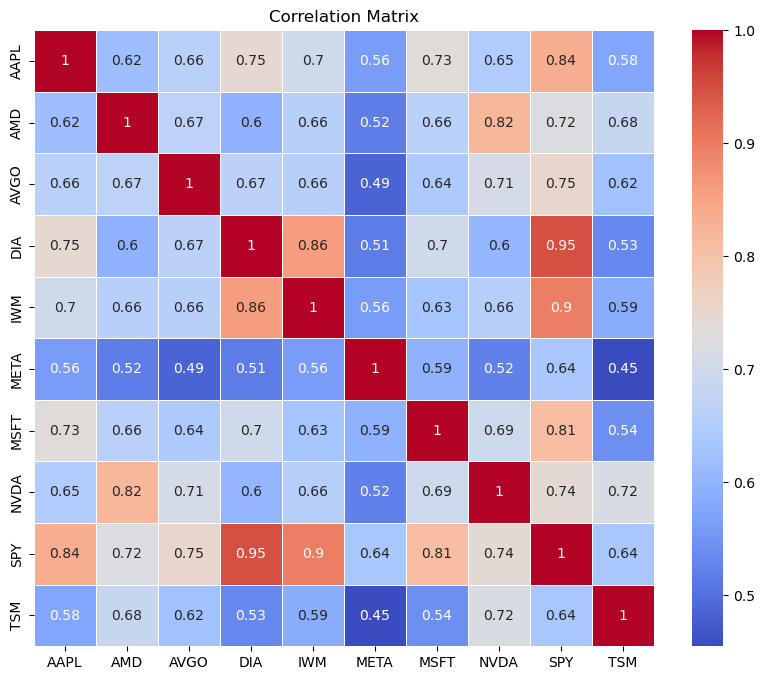

In [8]:
# Correlation Matrix
corr_matrix = returns.corr()  # Calculating correlation matrix on returns
print(corr_matrix.round(2))  # Displaying the correlation matrix

In [ ]:
# Visualizing the Correlation Matrix
plt.figure(figsize=(10, 8))
sn.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Step 4: Calculate efficient frontier and optimal weights for your portfolio (Don’t forget the output!)

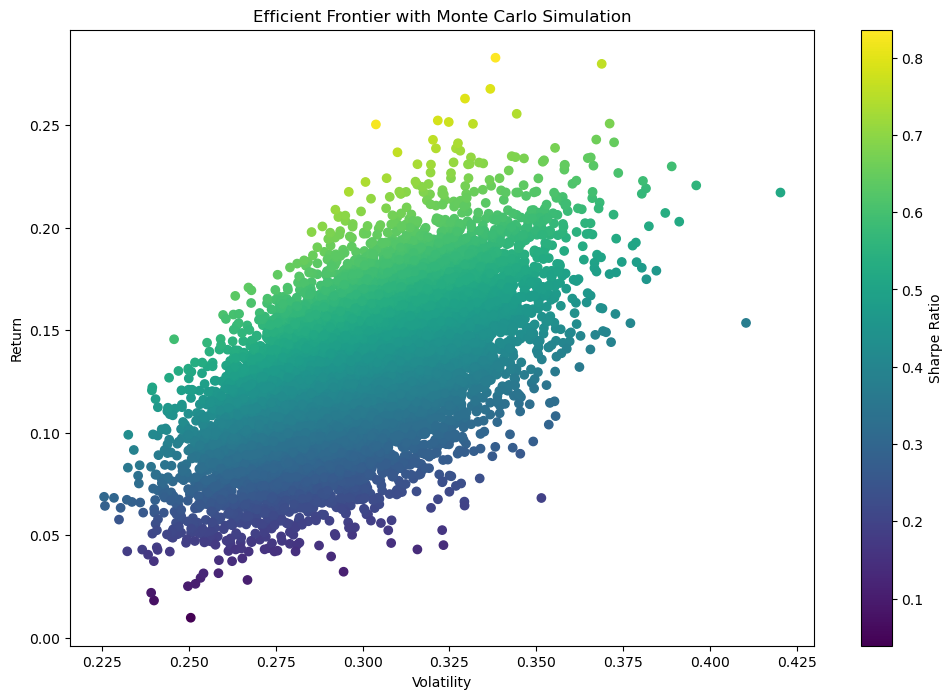

In [10]:

# Assuming `returns` DataFrame is already defined as before
num_portfolios = 10000
all_weights = np.zeros((num_portfolios, len(assets)))
ret_arr = np.zeros(num_portfolios)
vol_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

np.random.seed(42)  # for reproducible results

for x in range(num_portfolios):
    # Weights
    weights = np.array(np.random.random(len(assets)))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum( (returns.mean() * weights * 252))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

# Plotting the data
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier with Monte Carlo Simulation')
plt.show()


In [11]:
# Step 5: Use MatPlotLib or Seaborn libraries to graph the results (matrix and frontier)

In [12]:
# Step 6: Output the calculated optimal weighting (identify portfolio weightings for optimum Sharpe Ratio)
# along with the efficient frontier and correlation matrix charts. Output to a saved file.